In [1]:
import pandas as pd
import numpy as np
import plotly
plotly.tools.set_credentials_file(username='sherry9788', api_key='Cw40WD6lRwalI8wtPd72')
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Variables

In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
df2 = df.copy().dropna()
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [8]:
df2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Name

In [9]:
df.Name.nunique()

11562

Not every one is unique, check to see what the duplicates look like

In [10]:
df[df.Name==df[df.Name.duplicated()].Name.values[0]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [11]:
df2.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

These are the games that have versions across multiple platforms.

## Platform

In [12]:
data = [go.Histogram(x=df2.Platform)]
py.iplot(data, filename='Platform Frequency')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sherry9788/0 or inside your plot.ly account where it is named 'Platform Frequency'


In [13]:
platform = df2.Platform.value_counts()
print(platform)

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64


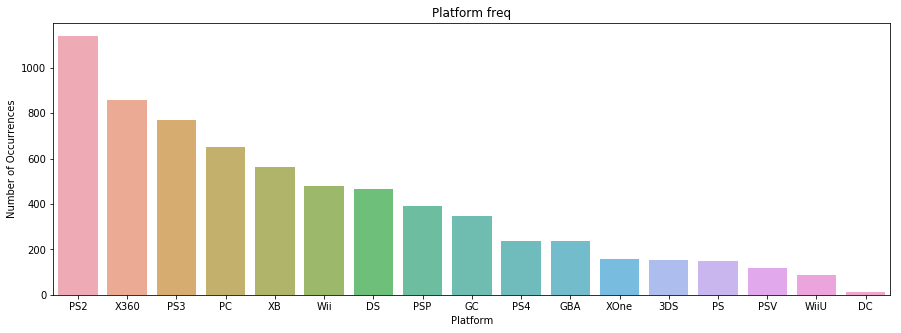

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(platform.index, platform.values, alpha=0.8)
plt.title('Platform freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Platform')
plt.show()

## Genre

In [15]:
df2.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
genre = df2.Genre.value_counts()
print(genre)

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64


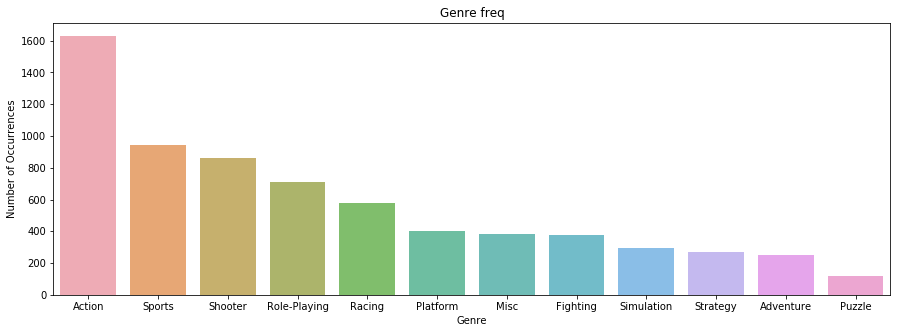

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Genre freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

## Publisher

In [18]:
df2.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'RedOctane', 'Atari', 'Eidos Interactive', 'Namco Bandai Games',
       'Vivendi Games', 'MTV Games', 'Sega', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment',
       'Midway Games', 'Deep Silver', 'NCSoft', 'Tecmo Koei',
       'Valve Software', 'Infogrames', 'Mindscape', 'Valve', 'Hello Games',
       'Global Star', 'Gotham Games', 'Crave Entertainment',
       'Hasbro Interactive', 'Codemasters', 'TDK Mediactive', 'Zoo Games',
       'Sony Online Entertainment', 'RTL', 'D3Publisher',
       'Black Label Games', 'Sou

In [19]:
len(df2.Publisher.unique())

262

In [20]:
df2.Publisher.value_counts().iloc[:40]

Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                                  80
Deep Silver                       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

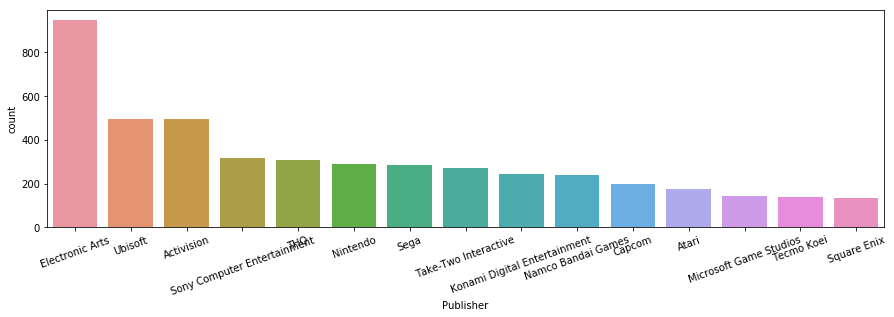

In [21]:
plt.figure(figsize=(15, 4))
sns.countplot(df2.Publisher, order=df2.Publisher.value_counts().iloc[:15].index)
plt.xticks(rotation=20)

## Year of Release

In [22]:
np.sort(df2.Year_of_Release.unique())

array([ 1985.,  1988.,  1992.,  1994.,  1996.,  1997.,  1998.,  1999.,
        2000.,  2001.,  2002.,  2003.,  2004.,  2005.,  2006.,  2007.,
        2008.,  2009.,  2010.,  2011.,  2012.,  2013.,  2014.,  2015.,
        2016.])

In [23]:
df2.Year_of_Release = df2.Year_of_Release.astype(int)

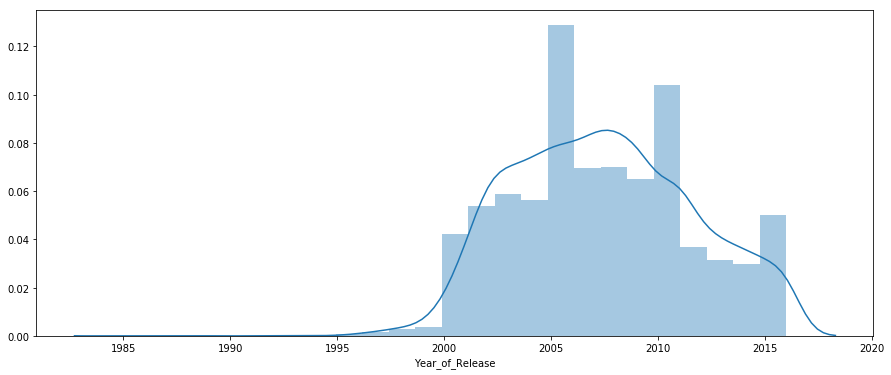

In [24]:
plt.figure(figsize=(15, 6))
sns.distplot(df2.Year_of_Release, bins=df2.Year_of_Release.nunique())

## Critic_Score, Critic_Count, User_Score, User_Count

TypeError: unsupported operand type(s) for /: 'str' and 'int'

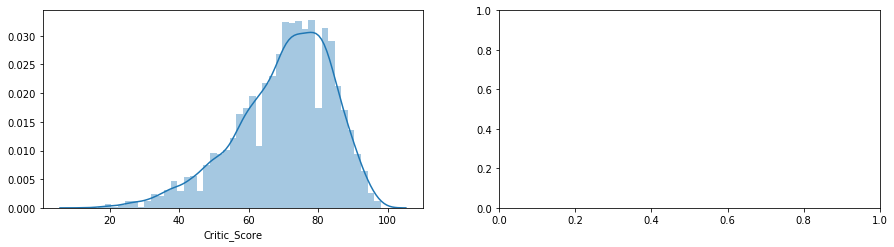

In [25]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.distplot(df2.Critic_Score)

plt.subplot(2,2,2)
sns.distplot(df2.User_Score)

plt.subplot(2,2,3)
sns.distplot(df2.Critic_Count)

plt.subplot(2,2,4)
sns.distplot(df2.User_Count)

## Developer

In [26]:
df2.Developer.unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Fluid Studios', 'Atomic Games'], dtype=object)

In [27]:
len(df2.Developer.unique())

1289

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

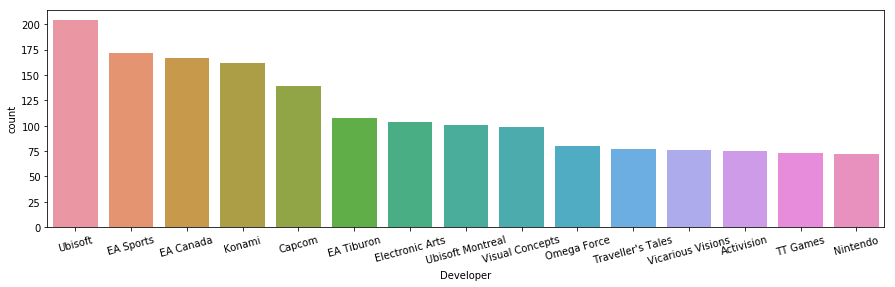

In [28]:
plt.figure(figsize=(15, 4))
sns.countplot(df.Developer, order=df.Developer.value_counts().iloc[:15].index)
plt.xticks(rotation=15)

In [29]:
sony_studio = df2.loc[(df2.Publisher.isnull()==False) & (df2.Publisher.str.contains('Sony')), 'Developer'].value_counts()
print(sony_studio[np.arange(10)])

SCEA San Diego Studios    25
SCE Japan Studio          17
SCEA                      14
989 Sports                12
SCEE London Studio        12
Namco                     12
Naughty Dog               10
Zipper Interactive         8
SCEE                       7
Clap Hanz                  7
Name: Developer, dtype: int64


In [30]:
len(sony_studio)

124

## Rating

In [31]:
np.sort(df2.Rating.unique())

array(['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [32]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2082
M       1433
E10+     930
K-A        1
RP         1
AO         1
Name: Rating, dtype: int64


In [33]:
df2.loc[df2.Rating=='K-A', 'Rating'] = 'E' 

In [34]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2083
M       1433
E10+     930
RP         1
AO         1
Name: Rating, dtype: int64


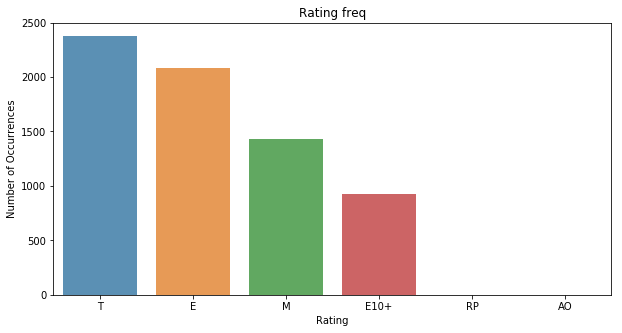

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(rating.index, rating.values, alpha=0.8)
plt.title('Rating freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Rating')
plt.show()

# NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

Game sales in North America (in millions of units)

In [36]:
((df.Global_Sales>=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*0.99) 
& (df.Global_Sales<=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*1.01)).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

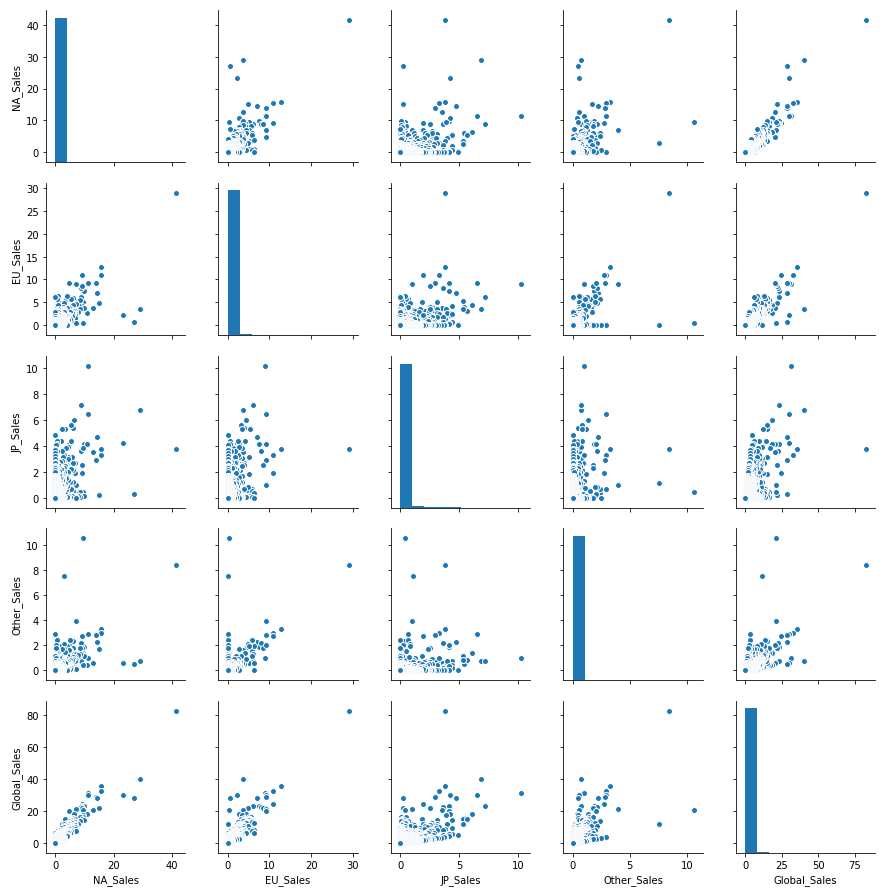

In [37]:
sns.pairplot(df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])

## Exploratory Analysis of the Data

## I. General 

### (1) What is general trend of number of games released and their regional sales by year?

In [38]:
df3=df2.copy()

In [39]:
df3.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

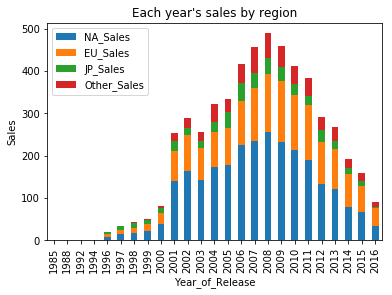

In [40]:
year=df3.groupby('Year_of_Release')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg('sum')
plt.figure(figsize=[20,10])
year.plot(kind='bar',stacked=True)
plt.title("Each year's sales by region")
plt.ylabel('Sales')

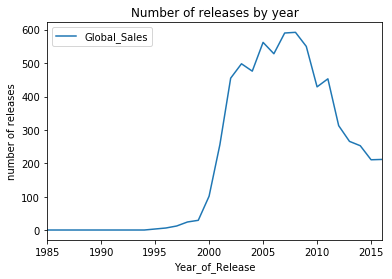

In [41]:
year2=df3.groupby('Year_of_Release')[['Global_Sales']].agg('count')
plt.figure(figsize=[20,10])
year2.plot()
plt.title('Number of releases by year')
plt.ylabel('number of releases')

### Comments:
From these two plots we can conclude that before 2001, the video games industry is not successful and between 2001 and 2010, the gaming industry is quickly developing, while after 2010, the sales slowly decreases. And throughout these years, NA_sales is always the largest among all global sales and EU_Sales is the second largest.


### (2) Is there a linear relationship between critic’s score and user’s score?

In [42]:
df3.User_Score=df3.User_Score.astype('float')

array([[ 1.        ,  0.58031837],
       [ 0.58031837,  1.        ]])

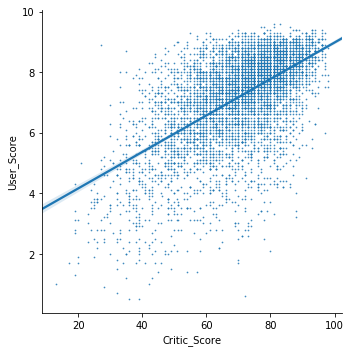

In [43]:

plt.figure(figsize=[20,10])
sns.lmplot(x='Critic_Score',y='User_Score',data=df3,x_jitter=.01,scatter_kws={"s": 0.5})
np.corrcoef(df3.Critic_Score,df3.User_Score)

### Comment:
There is a weak linear relationship between the Critic's Score and User's Score.

### (3) What is the most profitable games of all times in each region?

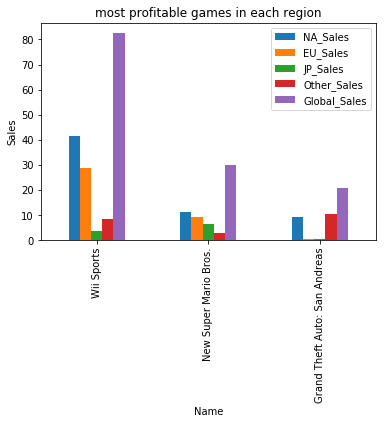

In [44]:
profit=pd.DataFrame(df3.loc[df3['Global_Sales'].idxmax()]).transpose()
profit=profit.append(pd.DataFrame(df3.loc[df3['NA_Sales'].idxmax()]).transpose())
profit=profit.append(pd.DataFrame(df3.loc[df3['EU_Sales'].idxmax()]).transpose())
profit=profit.append(pd.DataFrame(df3.loc[df3['JP_Sales'].idxmax()]).transpose())
profit=profit.append(pd.DataFrame(df3.loc[df3['Other_Sales'].idxmax()]).transpose())
profit=profit.drop_duplicates()
profit=profit[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
plt.figure(figsize=[20,10])
profit.plot(x='Name',kind='bar')
plt.title('most profitable games in each region')
plt.ylabel('Sales')

### Comment:
From this plot, we can see that Wii Sports has the most global sales, North American sales, and European sales, New Super Mario Bros has the highest Japanese sales, and Grand Theft Auto: San Andreas has the highest sales in other regions.

## II. Publisher

### (1) What are the top publishers according to sales by region?
 


In [45]:
NA_Table=pd.DataFrame(pd.pivot_table(df3,index='Publisher',values='NA_Sales',
                                     aggfunc=np.sum).sort_values('NA_Sales',ascending=False))
NA_Table.loc[:,'NA_Sales_prop'] = NA_Table.loc[:,'NA_Sales']/sum(NA_Table.loc[:,'NA_Sales'])
NA_Table.iloc[10,:]=NA_Table.iloc[10:,].sum(axis=0)
num1=NA_Table.iloc[10,0]
num2=NA_Table.iloc[10,1]
NA_Table2=NA_Table.copy()
NA_Table2=NA_Table.iloc[:11,]
NA_Table2=pd.DataFrame(NA_Table,index=['Electronic Arts','Nintendo','Activision','Take-Two Interactive',
                                        'Sony Computer Entertainment','Ubisoft','Microsoft Game Studios',
                                         'THQ','Sega','Warner Bros. Interactive Entertainment','Others'])                      
NA_Table2.iloc[10,0]=num1
NA_Table2.iloc[10,1]=num2
NA_Table.iloc[10,:]=NA_Table.iloc[10,:]-NA_Table.iloc[11:,].sum(axis=0)

In [46]:
EU_Table=pd.pivot_table(df3,index='Publisher',values='EU_Sales',
               aggfunc=np.sum).sort_values('EU_Sales',ascending=False)
EU_Table.loc[:,'EU_Sales_prop'] = EU_Table.loc[:,'EU_Sales']/sum(EU_Table.loc[:,'EU_Sales'])
EU_Table.iloc[10,:]=EU_Table.iloc[10:,].sum(axis=0)
num1=EU_Table.iloc[10,0]
num2=EU_Table.iloc[10,1]
EU_Table2=EU_Table.copy()
EU_Table2=EU_Table.iloc[:11,]
EU_Table2=pd.DataFrame(EU_Table,index=['Electronic Arts','Nintendo','Activision','Ubisoft','Sony Computer Entertainment',
                                       'Take-Two Interactive','Microsoft Game Studios', 'Sega','THQ',
                                        'Konami Digital Entertainment','Others'])                      
EU_Table2.iloc[10,0]=num1
EU_Table2.iloc[10,1]=num2
EU_Table.iloc[10,:]=EU_Table.iloc[10,:]-EU_Table.iloc[11:,].sum(axis=0)

In [47]:
JP_Table=pd.pivot_table(df3,index='Publisher',values='JP_Sales',
                        aggfunc=np.sum).sort_values('JP_Sales',ascending=False)
JP_Table.loc[:,'JP_Sales_prop'] = JP_Table.loc[:,'JP_Sales']/sum(JP_Table.loc[:,'JP_Sales'])
JP_Table.iloc[10,:]=JP_Table.iloc[10:,].sum(axis=0)
num1=JP_Table.iloc[10,0]
num2=JP_Table.iloc[10,1]
JP_Table2=JP_Table.copy()
JP_Table2=JP_Table.iloc[:11,]
JP_Table2=pd.DataFrame(JP_Table,index=['Nintendo','Sony Computer Entertainment','Square Enix','Capcom',
                                      'Namco Bandai Games','Konami Digital Entertainment','Tecmo Koei','Sega',
                                        'SquareSoft','Electronic Arts','Others'])                      
JP_Table2.iloc[10,0]=num1
JP_Table2.iloc[10,1]=num2
JP_Table.iloc[10,:]=JP_Table.iloc[10,:]-JP_Table.iloc[11:,].sum(axis=0)

In [48]:
Other_Table=pd.pivot_table(df3,index='Publisher',values='Other_Sales',
                           aggfunc=np.sum).sort_values('Other_Sales',ascending=False)
Other_Table.loc[:,'Other_Sales_prop'] = Other_Table.loc[:,'Other_Sales']/sum(Other_Table.loc[:,'Other_Sales'])
Other_Table.iloc[10,:]=Other_Table.iloc[10:,].sum(axis=0)
num1=Other_Table.iloc[10,0]
num2=Other_Table.iloc[10,1]
Other_Table2=Other_Table.copy()
Other_Table2=Other_Table.iloc[:11,]
Other_Table2=pd.DataFrame(Other_Table,index=['Electronic Arts','Nintendo','Activision','Sony Computer Entertainment',
                                             'Take-Two Interactive','Ubisoft','Konami Digital Entertainment','THQ',
                                             'Microsoft Game Studios','Sega','Others'])                      
Other_Table2.iloc[10,0]=num1
Other_Table2.iloc[10,1]=num2
Other_Table2
Other_Table.iloc[10,:]=Other_Table.iloc[10,:]-Other_Table.iloc[11:,].sum(axis=0)

In [49]:
Global_Table=pd.pivot_table(df3,index='Publisher',values='Global_Sales',
                            aggfunc=np.sum).sort_values('Global_Sales',ascending=False)
Global_Table.loc[:,'Global_Sales_prop'] = Global_Table.loc[:,'Global_Sales']/sum(Global_Table.loc[:,'Global_Sales'])
Global_Table.iloc[10,:]=Global_Table.iloc[10:,].sum(axis=0)
num1=Global_Table.iloc[10,0]
num2=Global_Table.iloc[10,1]
Global_Table2=Global_Table.copy()
Global_Table2=Global_Table.iloc[:11,]
Global_Table2=pd.DataFrame(Global_Table,index=['Electronic Arts','Nintendo','Activision','Sony Computer Entertainment',
                                             'Take-Two Interactive','Ubisoft','Microsoft Game Studios','THQ','Sega',
                                                'Konami Digital Entertainment','Others'])                      
Global_Table2.iloc[10,0]=num1
Global_Table2.iloc[10,1]=num2
Global_Table.iloc[10,:]=Global_Table.iloc[10,:]-Global_Table.iloc[11:,].sum(axis=0)

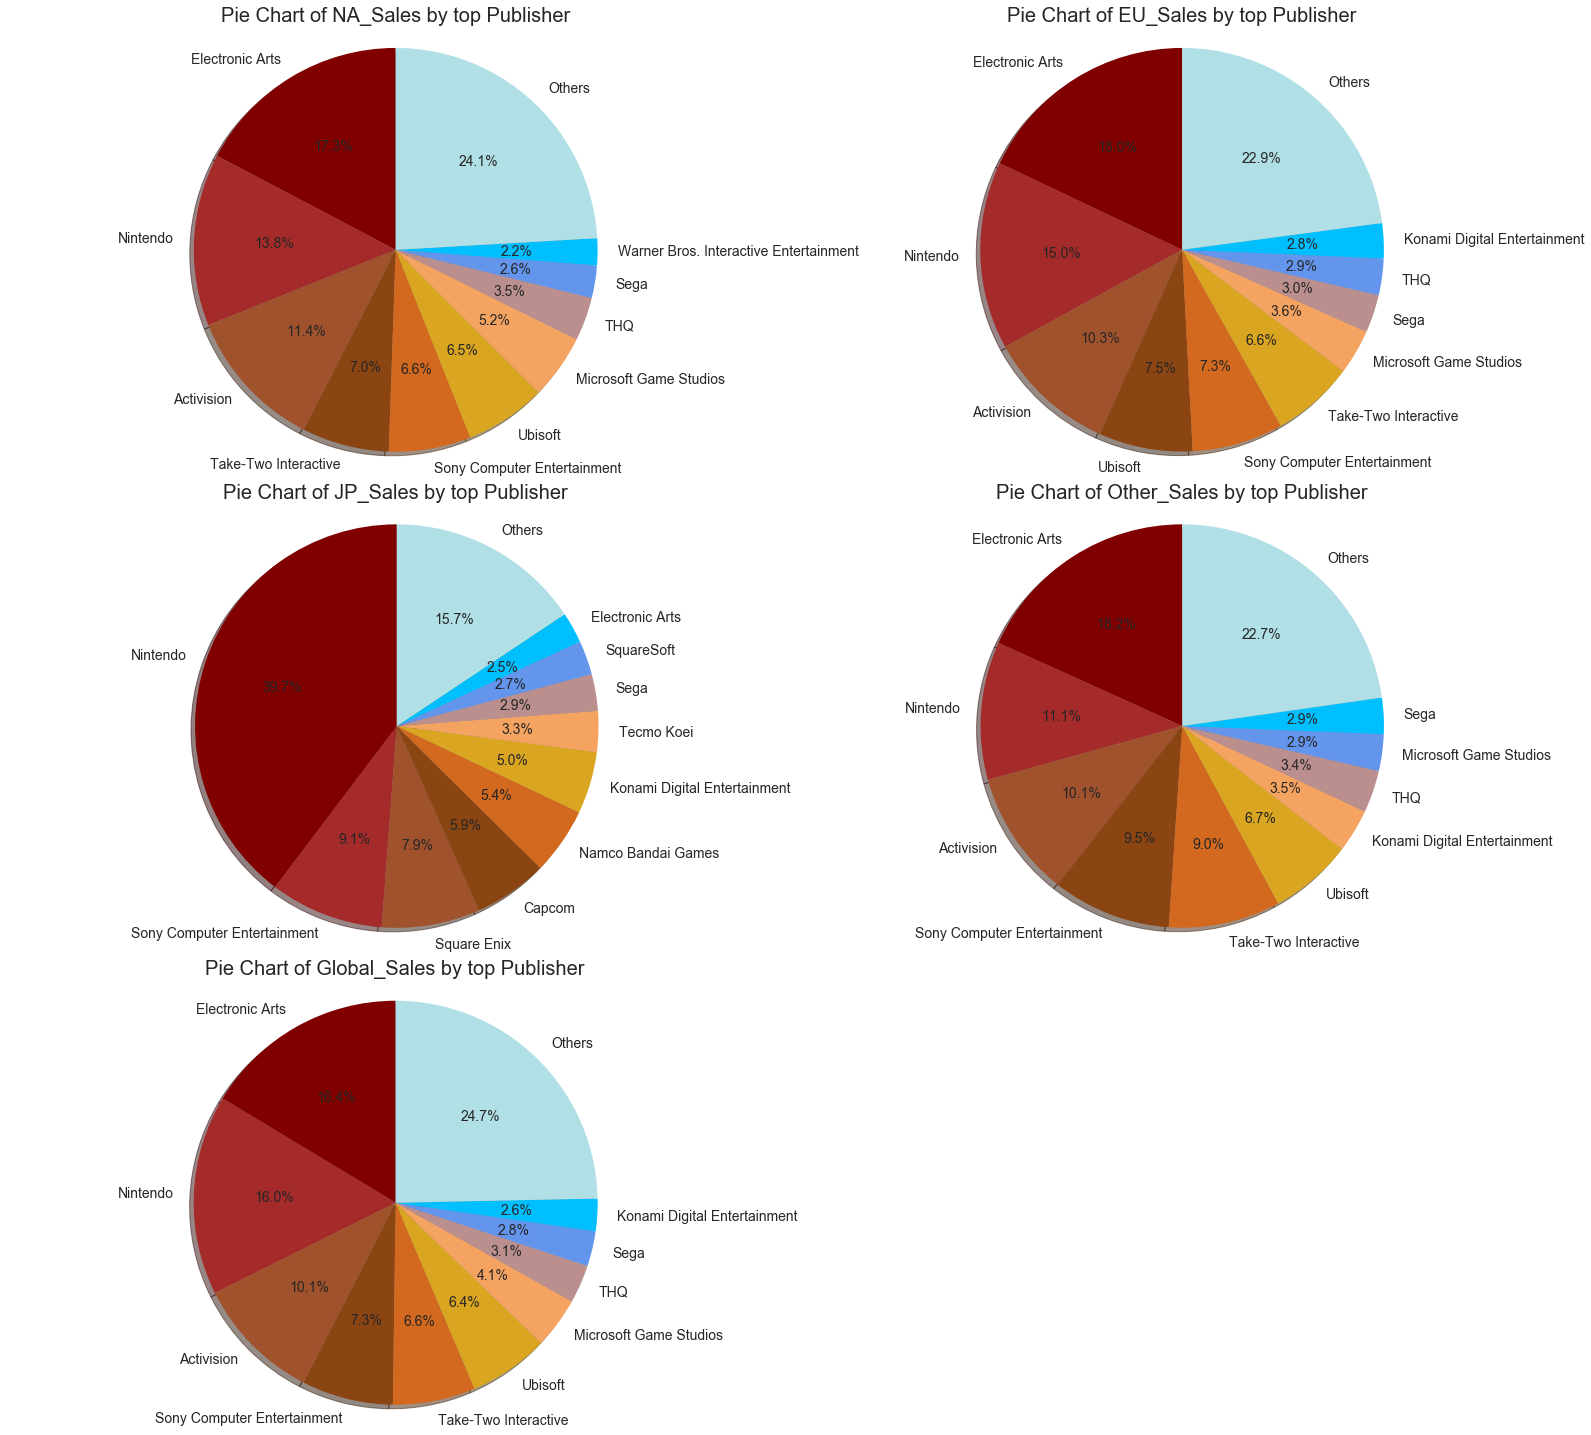

In [50]:
# Plotting our pie charts
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['#800000','#A52A2A','#A0522D','#8B4513','#D2691E',
         '#DAA520','#F4A460','#BC8F8F','#6495ED','#00BFFF','powderblue']
plt.figure(figsize=(22,20))
plt.subplot(3,2,1)
plt.pie(
    NA_Table2.NA_Sales_prop,
    labels=NA_Table2.index,
    shadow=True,
    # stating our colors
    colors=colors,
    startangle=90,
    textprops={'fontsize': 14},
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of NA_Sales by top Publisher',size=20)
plt.subplot(3,2,2)
plt.pie(
    EU_Table2.EU_Sales_prop,
    labels=EU_Table2.index,
    shadow=True,
    # stating our colors
    colors=colors,
    startangle=90,
    textprops={'fontsize': 14},
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of EU_Sales by top Publisher',size=20)
plt.subplot(3,2,3)
plt.pie(
    JP_Table2.JP_Sales_prop,
    labels=JP_Table2.index,
    shadow=True,
    # stating our colors
    colors=colors,
    startangle=90,
    textprops={'fontsize': 14},
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of JP_Sales by top Publisher',size=20)
plt.subplot(3,2,4)
plt.pie(
    Other_Table2.Other_Sales_prop,
    labels=Other_Table2.index,
    shadow=True,
    # stating our colors
    colors=colors,
    startangle=90,
    textprops={'fontsize': 14},
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Other_Sales by top Publisher',size=20)
plt.subplot(3,2,5)
plt.pie(
    Global_Table2.Global_Sales_prop,
    labels=Global_Table2.index,
    shadow=True,
    # stating our colors
    colors=colors,
    startangle=90,
    textprops={'fontsize': 14},
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global_Sales by top Publisher',size=20)
plt.tight_layout()
plt.show()

### Comment:
In general, the Electronic Arts, Nintendo, and Activision are respectively the publishers that have largest, second largest, and third largest market share in global sales, north american sales, european sales, and sales in other regions. And the other publishers which are often among the top 10 publishers according to sales in regions other than Japan are Sony Computer Entertainment, Take-Two Interactive, Ubisoft, Microsoft Game Studios, THQ, Sega, Konami Digital Entertainment. And for north american market, Warner Bros. Interactive Entertainment also has a lot of market share. 
Japanese market is quite different, in which Nintendo has around 40% market share and many of the top 10 publishers in this market does not have a significant share in other markets. 

### (2) What is the Top 5 Global sales Publishers' sales breakdown by region?

In [51]:
top5=Global_Table2.index[0:5]
top5

Index(['Electronic Arts', 'Nintendo', 'Activision',
       'Sony Computer Entertainment', 'Take-Two Interactive'],
      dtype='object')

In [52]:
region=df3.loc[df3.Publisher.isin(top5)][['Publisher','NA_Sales',
                                           'EU_Sales','JP_Sales','Other_Sales']].groupby('Publisher').sum()

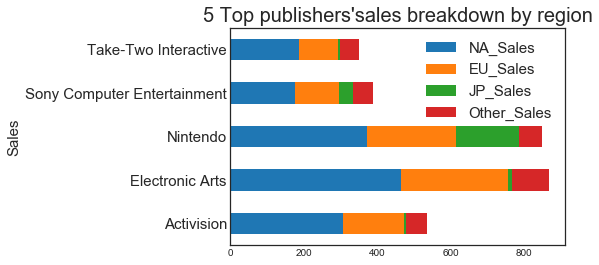

In [53]:
plt.figure(figsize=[20,15])
region.plot.barh(stacked=True)
plt.title("5 Top publishers'sales breakdown by region",size=20)
plt.legend(prop={'size':15})
plt.yticks(size=15)
plt.ylabel('Sales',size=15)

### Comment:
From this plot, we can see that amoung the top 5 global sales publishers only Nintendo and Sony Computer Entertainment's JP sales account for a somewhat large proportion of the total sales. In general, NA_sales is the largest part of these publishers's sales and EU_sales is also large.

### (3) What is the Top 5 Global sales Publishers' Number of Releases by year?

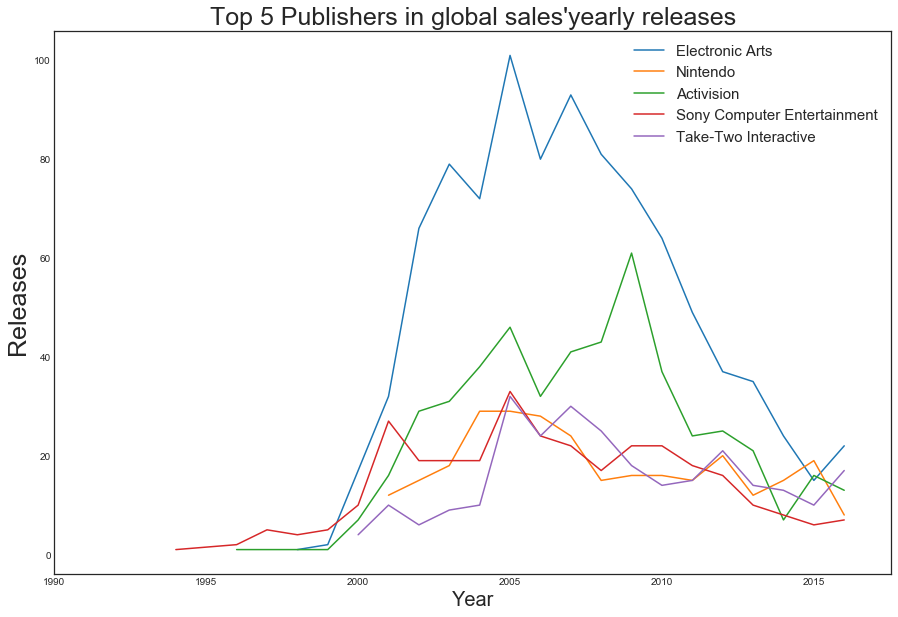

In [54]:
top10=Global_Table2.index.tolist()[:10]
release=pd.pivot_table(df3.loc[df3.Publisher.isin(top5)][['Year_of_Release','Publisher','Critic_Score']],index=['Year_of_Release'],columns='Publisher',values='Critic_Score',aggfunc='count')
release.fillna(0)
plt.figure(figsize=[15,10])
plt.plot(release.loc[:,'Electronic Arts'])
plt.plot(release.loc[:,'Nintendo'])
plt.plot(release.loc[:,'Activision'])
plt.plot(release.loc[:,'Sony Computer Entertainment'])
plt.plot(release.loc[:,'Take-Two Interactive'])
plt.legend(prop={'size':15})
plt.xlabel('Year',size=20)
plt.ylabel('Releases',size=25)
plt.xlim(1990, )
plt.title("Top 5 Publishers in global sales'yearly releases",size=25)
plt.show()


### Comment:
From the plot we can see that Electronic Arts have largest release by year in overall. And the year between 2000 and 2010 is the best time for the top 10 video game publishers when they publish the most number of releases. The decrease of number of releases after 2010 is probably because the developers focus more on updating the exisitng successful video games. 

### (4)How is the distribution of critic's score of the top 3 publisher different from that of all publishers?

In [55]:
top5

Index(['Electronic Arts', 'Nintendo', 'Activision',
       'Sony Computer Entertainment', 'Take-Two Interactive'],
      dtype='object')

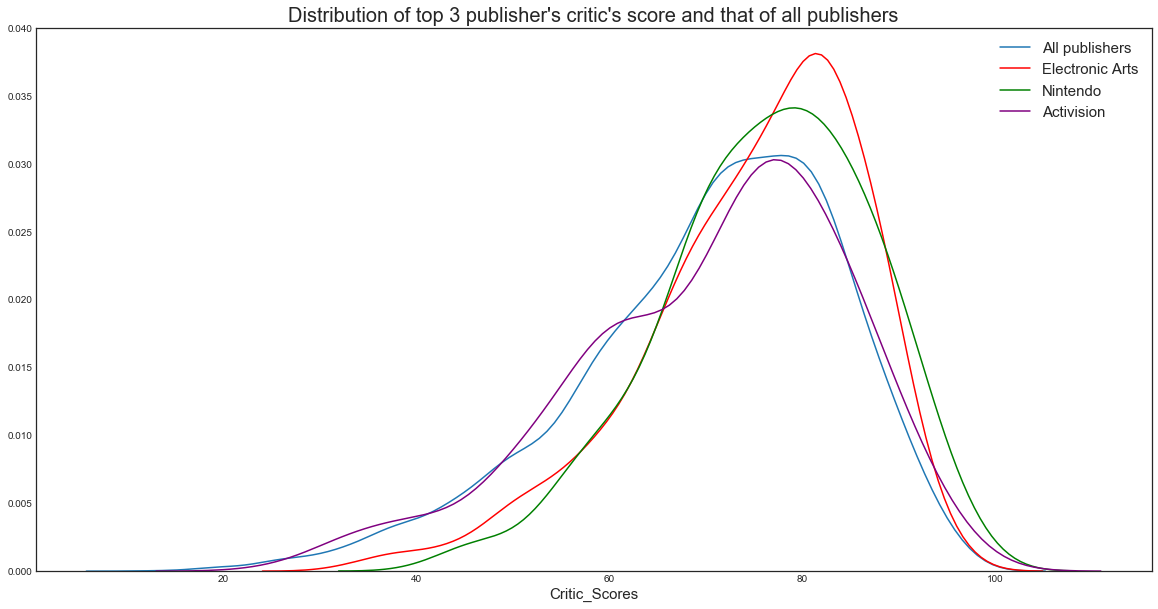

In [56]:
critic=df3[['Critic_Score']].sort_values('Critic_Score',ascending=False)
critic1=df3.loc[df3.Publisher==top5[0]].sort_values('Critic_Score',ascending=False)[['Critic_Score']]
critic2=df3.loc[df3.Publisher==top5[1]].sort_values('Critic_Score',ascending=False)[['Critic_Score']]
critic3=df3.loc[df3.Publisher==top5[2]].sort_values('Critic_Score',ascending=False)[['Critic_Score']]
plt.figure(figsize=[20,10])
sns.distplot(critic.Critic_Score,label='All publishers',hist=False)
sns.distplot(critic1.Critic_Score, label='Electronic Arts',hist=False,color='red')
sns.distplot(critic2.Critic_Score, label='Nintendo',hist=False,color='green')
sns.distplot(critic3.Critic_Score, label='Activision',hist=False,color='purple')
plt.title("Distribution of top 3 publisher's critic's score and that of all publishers",size=20)
plt.xlabel('Critic_Scores',size=15)
plt.ylim(0,0.04)
plt.legend(prop={'size':15})

### Comment:
From this plot we can see that among the top 3 publishers, the Electronic Arts and Nintendo typically have a high distribution of critic score than that of all publishers, while Activision has an approximatley same critic's score's distribution than that of all publishers.

### (5)How is the distribution of user's score of the top 3 publisher different from that of all publishers?

In [57]:
df3.User_Score=df3.User_Score.astype('float')

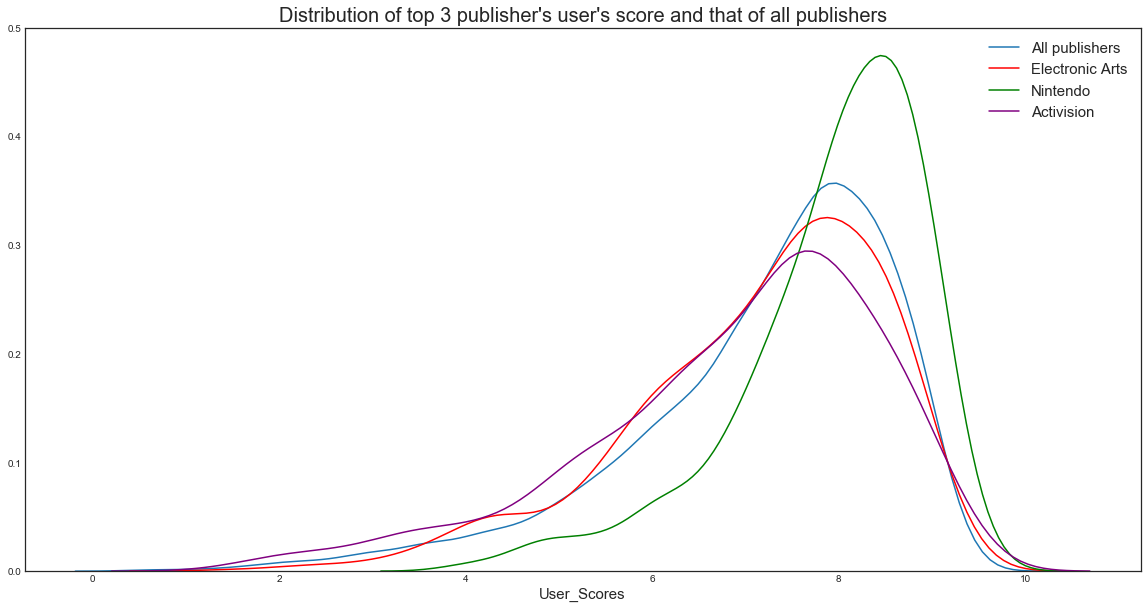

In [58]:
user=df3[['User_Score']].sort_values('User_Score',ascending=False)
user1=df3.loc[df3.Publisher==top5[0]].sort_values('User_Score',ascending=False)[['User_Score']]
user2=df3.loc[df3.Publisher==top5[1]].sort_values('User_Score',ascending=False)[['User_Score']]
user3=df3.loc[df3.Publisher==top5[2]].sort_values('User_Score',ascending=False)[['User_Score']]
plt.figure(figsize=[20,10])
sns.distplot(user.User_Score,label='All publishers',hist=False)
sns.distplot(user1.User_Score, label='Electronic Arts',hist=False,color='red')
sns.distplot(user2.User_Score, label='Nintendo',hist=False,color='green')
sns.distplot(user3.User_Score, label='Activision',hist=False,color='purple')
plt.title("Distribution of top 3 publisher's user's score and that of all publishers",size=20)
plt.xlabel('User_Scores',size=15)
plt.ylim(0,0.50)
plt.legend(prop={'size':15})


### Comment:
From this plot we can see that among the top 3 publishers,  Nintendo typically have a high distribution of user's score than that of all publishers, while Electronic Arts and Activision have an approximatley same user's score's distribution than that of all publishers.

In [59]:
user10top=df3.groupby('Publisher')[['User_Score','User_Count']].mean().sort_values('User_Score',ascending=False).head(10)
print(user10top)
plt.figure(figsize=[20,10])
sns.distplot(user.User_Count)
plt.title("Distribution of average user count of each publisher",size=20)
plt.xlabel('User_Count',size=15)

                          User_Score  User_Count
Publisher                                       
Square                      9.100000        37.0
Sunflowers                  9.100000        89.0
Kadokawa Shoten             9.000000        36.0
SNK                         8.800000        14.0
Blue Byte                   8.800000       130.0
Kool Kizz                   8.800000         6.0
Nihon Falcom Corporation    8.800000       237.0
Havas Interactive           8.800000      1056.0
GT Interactive              8.733333        81.0
Jester Interactive          8.700000         9.0


AttributeError: 'DataFrame' object has no attribute 'User_Count'

### Comment: 
From the table, we can see that there are some publishers that do not have a very large market share but have a high users score. When we compare this table with the previous table that shows the publishers that have high average critic's scores, we can see that Blue Byte, Square, and Havas Interactive have both high critic score and user score, with not too small a user count or a critic count.
